In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import glob, pdb, os, sys, cv2
from ripser import ripser
from persim import plot_diagrams
import gudhi as gd
from angio import angio_abm, radial_persistence, level_set_flooding, Persist_im

0


<IPython.core.display.Javascript object>


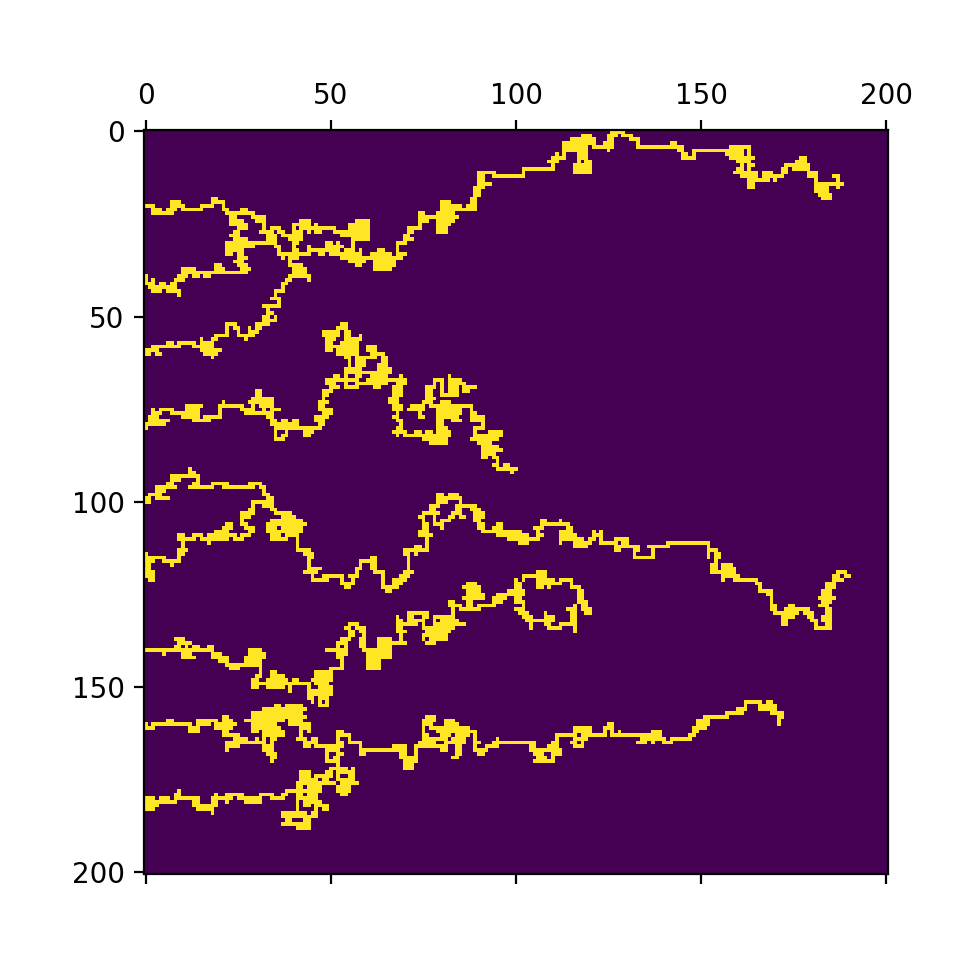

In [5]:
#initialize simulation

#### chemoattractant distribution
# linear : profile linearly increases with x
# tumor  : profile max as the point (1,0.5) imitating a tumor center at that location
C_dist = 'linear'

#max time units a simulation can run
final_time = 20.0

#chemotaxis rate
chemo_rate = 'const'

#how many ABM sims to run simulation
ABM_sims = 1

#lists of chi & rho values to run the model for
psi_vec = np.linspace(1,0,11)#,.1]#,.1]#[0.05,0.1,0.2,0.3]

count = 1

hapt = 0.3
chi = 0.25

for psi in psi_vec:
    for i in [0]:#np.arange(ABM_sims):

        print(i)

        #initialize ABM simulation
        A = angio_abm(C_dist,
                      rho = hapt,
                      t_final = final_time,
                      chi = chi,
                      chemo_rate = chemo_rate,
                      psi = psi)

        #initialize chemoattractant and TAF grids, sprout locations
        A.IC_generate()
        A.sprout_initialize()

        #Record biological data (sprouts, tips, branches)
        A.record_bio_data()

        #Run the ABM until either one of the sprouts reaches x=0.95
        #or when time exceeds max_sim_time
        j = 0
        max_x = 0
        while max_x < 0.95:

            #move sprouts
            A.move_sprouts()
            #update TAF , chemoattractant
            A.update_grids()
            #perform branching
            A.branch()

            #Save bio info
            A.record_bio_data()

            #max x value reached by sprout tips
            max_x = np.max(A.X[A.N==1])

            j+=1
            if A.dt*j > final_time:
                #stop simulation if time exceeds max_sim_time
                break

        A.save_bio_data(i)

        A.plane_sweeping_TDA(i)

        A.save_flooding_TDA(i)


        plt.matshow(A.N.T)